In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
import datetime

%matplotlib inline


#pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (7, 5)

## JUICIOS ABIERTOS RE.NA.LI.

In [2]:
#Importo la base

base=pd.read_excel(r'C:\Users\eangenello\Desktop\TECNICA\Python\input\ART\Juicios abiertos al 31-03-19 - SSN.xlsx')

In [3]:
# Visualizo los primeros datos

base.head()

,Aseguradora,NROEXPJUDICIAL,CARATULA,F_notificacion,DPTOJUDICIAL,Fuero,Juzgado,provincia,CUIT,Empleador,NSINIESTRO,MONTO RECLAMADO INDETERMINADO,MONTO RECLAMADO,SENTPRIMERA,Contingencia reclamada,Enfermedad Reclamada,Objeto de reclamo,Objeto de reclamo Clasificado,F_siniestro
0,ASOCIART,0168-0000027680/18,MOREYRA ELSA GRACIELA C/ ASOCIART S.A. ART S/ ...,2018-09-03,168,LABORAL,NACIONAL DE 1ª INSTANCIA DEL TRABAJO Nº 36,C.A.B.A.,20040974041,RUDELIR JAIME JOSE ...,411888201603390976,N,"206,700.00",nan,Accidentes in itinere.,NaN,LRT - Prestación dineraria,LRT,2016-08-11
1,ASOCIART,0847-0000015008/17,VILAS NICOLAS ALEJANDRO C/ ASOCIART S.A. ART S...,2017-06-15,847,LABORAL,TRIBUNAL DEL TRABAJO DE BRAGADO,BS.AS.,20042360091,LYNCH RICARDO FLORENCIO ...,411327201603256000,N,"384,595.75",nan,Accidentes de trabajo.,NaN,LRT - Prestación dineraria,LRT,2016-08-21
2,ASOCIART,0186-0000050377/14,DOPAZO JULIO HORACIO C/ ASOCIART S.A. ART Y OT...,2015-03-18,186,LABORAL,NACIONAL DE 1ª INSTANCIA DEL TRABAJO Nº 54,C.A.B.A.,20041475073,RACHID HUGO OMAR RENEE ...,214212200704480992,N,"1,825,162.04",nan,Accidentes de trabajo.,NaN,CC - Art. 1072,CC,2007-09-28
3,ASOCIART,0193-0000003142/14,BENAVIDEZ JAVIER LEOCADIO C/ ASOCIART S.A. ART...,2014-04-07,193,LABORAL,NACIONAL DE 1ª INSTANCIA DEL TRABAJO Nº 61,C.A.B.A.,20042851567,MAGGI PEDRO JUAN ...,12209845201005400064,N,"815,000.00",nan,Accidentes de trabajo.,NaN,CC - Art. 1072,CC,2010-12-15
4,ASOCIART,0169-0000026113/18,JESUS DA SILVA RAMONA MARGARITA C/ ASOCIART AR...,2018-10-16,169,LABORAL,NACIONAL DE 1ª INSTANCIA DEL TRABAJO Nº 37,C.A.B.A.,20018204992,TODOLI ALBERTO ...,415907201604384000,N,"230,232.00",nan,Accidentes de trabajo.,NaN,LRT - Prestación dineraria,LRT,2016-11-04


In [4]:
# Veo el tipo de cada variable

base.dtypes

Aseguradora                              object
NROEXPJUDICIAL                           object
CARATULA                                 object
F_notificacion                   datetime64[ns]
DPTOJUDICIAL                              int64
Fuero                                    object
Juzgado                                  object
provincia                                object
CUIT                                     object
Empleador                                object
NSINIESTRO                               object
MONTO RECLAMADO INDETERMINADO            object
MONTO RECLAMADO                         float64
SENTPRIMERA                             float64
Contingencia reclamada                   object
Enfermedad Reclamada                     object
Objeto de reclamo                        object
Objeto de reclamo Clasificado            object
F_siniestro                      datetime64[ns]
dtype: object

In [5]:
#Cambio el tipo de dato

base['DPTOJUDICIAL'] = base['DPTOJUDICIAL'].astype(object)
base['SENTPRIMERA'] = base['SENTPRIMERA'].astype(object)

In [6]:
Dataset_compañías=pd.read_excel(r'C:\Users\eangenello\Desktop\TECNICA\Python\input\ART\Dataset_Compañías.xlsx', sheet_name='Sentencias')

base=base.merge(Dataset_compañías, how='inner', on='Aseguradora')

In [7]:
# Veo la distribución de las variables numéricas

base.describe()

,MONTO RECLAMADO,cod_cia
count,"308,208.00","330,567.00"
mean,"619,633.80",621.68
std,"1,840,549.17",95.48
min,0.00,7.00
25%,"168,115.75",618.00
50%,"364,572.20",619.00
75%,"714,292.35",621.00
max,"480,480,000.00",862.00


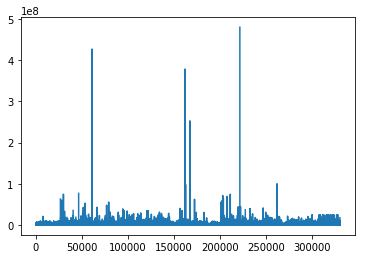

In [8]:
base['MONTO RECLAMADO'].plot()

### Imputación de valores missing

In [9]:
# Veo la cantidad de missing en la variable 'Monto Reclamado'

base['MONTO RECLAMADO'].isna().sum()

22359

In [10]:
# Observo por variable, la cantidad de datos, los missing y el tipo de dato

for i in base.columns:
    print(i)
    print("")
    print(base[i].isnull().value_counts())
    print("")


Aseguradora

False    330567
Name: Aseguradora, dtype: int64

NROEXPJUDICIAL

False    330567
Name: NROEXPJUDICIAL, dtype: int64

CARATULA

False    330567
Name: CARATULA, dtype: int64

F_notificacion

False    330567
Name: F_notificacion, dtype: int64

DPTOJUDICIAL

False    330567
Name: DPTOJUDICIAL, dtype: int64

Fuero

False    330567
Name: Fuero, dtype: int64

Juzgado

False    330567
Name: Juzgado, dtype: int64

provincia

False    330567
Name: provincia, dtype: int64

CUIT

False    329743
True        824
Name: CUIT, dtype: int64

Empleador

False    329676
True        891
Name: Empleador, dtype: int64

NSINIESTRO

False    330567
Name: NSINIESTRO, dtype: int64

MONTO RECLAMADO INDETERMINADO

False    284003
True      46564
Name: MONTO RECLAMADO INDETERMINADO, dtype: int64

MONTO RECLAMADO

False    308208
True      22359
Name: MONTO RECLAMADO, dtype: int64

SENTPRIMERA

True    330567
Name: SENTPRIMERA, dtype: int64

Contingencia reclamada

False    330133
True        434
Name:

In [11]:
# Me muestra una lista con el nombre de las columnas 

base.columns

Index(['Aseguradora', 'NROEXPJUDICIAL', 'CARATULA', 'F_notificacion',
       'DPTOJUDICIAL', 'Fuero', 'Juzgado', 'provincia', 'CUIT', 'Empleador',
       'NSINIESTRO', 'MONTO RECLAMADO INDETERMINADO', 'MONTO RECLAMADO',
       'SENTPRIMERA', 'Contingencia reclamada', 'Enfermedad Reclamada',
       'Objeto de reclamo', 'Objeto de reclamo Clasificado', 'F_siniestro',
       'cod_cia', 'denominacion_corta'],
      dtype='object')

In [12]:
# Creo la variable año

base['AÑO'] = pd.DatetimeIndex(base['F_notificacion']).year

In [13]:
# Creo la variable 'codigo', que es una concatenación de 'DPTO JUDICIAL', 'CONTINGENCIA' y 'AÑO'

base["codigo"]=[str(base["DPTOJUDICIAL"][i])+"-"+str(base["Contingencia reclamada"][i])+"-"+str(base["AÑO"][i]) for i in base.index]

In [14]:
# Cuento la canridad de casos diferentes de la variable 'codigo'

base["codigo"].value_counts()

244-Enfermedad profesional.-2017           903
2213-Enfermedad profesional.-2017          655
244-Accidentes de trabajo.-2017            534
2214-Enfermedad profesional.-2017          530
2213-Enfermedad profesional.-2018          455
2214-Enfermedad profesional.-2016          450
244-Enfermedad profesional.-2016           442
244-Accidentes de trabajo.-2016            442
836-Accidentes de trabajo.-2017            427
2267-Accidentes de trabajo.-2017           419
2268-Accidentes de trabajo.-2017           418
1089-Accidentes de trabajo.-2017           417
2213-Enfermedad profesional.-2016          412
268-Accidentes de trabajo.-2017            406
835-Accidentes de trabajo.-2018            401
2214-Enfermedad profesional.-2018          400
502-Accidentes de trabajo.-2018            397
834-Accidentes de trabajo.-2017            393
2875-Accidentes de trabajo.-2017           392
143-Accidentes de trabajo.-2016            390
835-Accidentes de trabajo.-2017            389
268-Accidente

In [15]:
# Remplazo los missing de 'MONTO RECLAMADO' por la media de la variable 'codigo' de cada caso

base["MONTO RECLAMADO"]=[base["MONTO RECLAMADO"][i] if math.isnan(base["MONTO RECLAMADO"][i])==False 
                         else base[base["codigo"]==base["codigo"][i]]["MONTO RECLAMADO"].mean()
                        for i in base.index]

In [16]:
# Evalúo si quedan missing en la variable 'MONTO RECLAMADO'

base["MONTO RECLAMADO"].isnull().value_counts()

False    329658
True        909
Name: MONTO RECLAMADO, dtype: int64

In [17]:
#for i in base["codigo"].unique():
#    base[base["codigo"]==i]["MONTO_RECLAMADO"].replace(np.nan,base[base["codigo"]==i]["MONTO_RECLAMADO"].mean())

In [18]:
# Me trae todos los datos de 'MONTO RECLAMADO' que tengan el código ="244-Enfermedad profesional.-2017" 

base[base["codigo"]=="244-Enfermedad profesional.-2017"]["MONTO RECLAMADO"]

668        225,149.22
3003       318,491.02
3011       361,756.80
3012       528,316.91
12041      368,561.34
13614      281,811.00
18203      683,147.69
23569      353,408.09
26208      842,842.18
26653      254,034.10
28545      191,992.00
28546      690,280.00
30241      415,475.48
32031    1,363,171.00
32032      867,206.00
32036      659,774.50
32037      966,540.21
32041    2,689,771.00
32178    2,423,510.38
32187    1,960,161.44
32588    1,501,072.00
32839    1,348,378.00
33671    2,886,577.00
34994      642,887.13
35802      155,252.00
38728       86,299.85
39042      648,578.00
40811    1,307,322.00
42997    1,954,149.09
42998      629,173.94
             ...     
303122   1,574,216.40
303141     537,172.97
303164     397,073.00
307520   1,926,968.00
307521   1,958,230.00
309914     290,635.52
310426   1,183,552.00
310464   1,361,867.44
310465   1,203,929.20
310496     617,047.00
311250     506,847.00
311257     521,227.00
313773     259,842.73
314586     286,268.16
314607    

In [19]:
# Me traela media de 'MONTO RECLAMADO' con el código ="244-Enfermedad profesional.-2017" 

base[base["codigo"]=="244-Enfermedad profesional.-2017"]["MONTO RECLAMADO"].mean()

1071095.2392761686

In [20]:
# Creo la variable 'codigo2', que es una concatenación de 'DPTO JUDICIAL' y 'AÑO'

base["codigo2"]=[str(base["DPTOJUDICIAL"][i])+"-"+str(base["AÑO"][i]) for i in base.index]

In [21]:
# Cuento la canridad de casos diferentes de la variable 'codigo2'

base["codigo2"].value_counts()

244-2017     1710
244-2016     1142
2213-2017    1022
2214-2017     847
836-2017      810
2797-2018     804
2798-2018     789
268-2017      755
1089-2017     744
2799-2018     740
2890-2017     734
2214-2016     734
2267-2017     716
2213-2018     714
835-2017      711
502-2018      703
2268-2017     701
143-2016      698
2304-2018     694
3053-2018     691
1763-2018     690
834-2017      686
835-2018      675
2890-2016     674
2214-2018     672
502-2017      665
2875-2017     663
191-2017      658
2213-2016     649
503-2017      646
             ... 
1045-2011       1
2843-2013       1
582-2012        1
630-2013        1
234-2017        1
1121-2011       1
582-2016        1
2364-2019       1
2374-2015       1
212-2016        1
805-2013        1
437-2016        1
76-2014         1
221-2017        1
454-2016        1
256-2011        1
2312-2018       1
3156-2015       1
500-2012        1
2850-2016       1
1447-2015       1
2322-2010       1
467-2010        1
1636-2011       1
75-2011   

In [22]:
# Remplazo los missing de 'MONTO RECLAMADO' por la media de la variable 'codigo2' de cada caso

base["MONTO RECLAMADO"]=[base["MONTO RECLAMADO"][i] if math.isnan(base["MONTO RECLAMADO"][i])==False 
                         else base[base["codigo2"]==base["codigo2"][i]]["MONTO RECLAMADO"].mean()
                        for i in base.index]

In [23]:
# Evalúo si quedan missing en la variable 'MONTO RECLAMADO'

base["MONTO RECLAMADO"].isnull().value_counts()

False    330064
True        503
Name: MONTO RECLAMADO, dtype: int64

In [24]:
# Remplazo los missing de 'MONTO RECLAMADO' por la media de la variable 'año' de cada caso

base["MONTO RECLAMADO"]=[base["MONTO RECLAMADO"][i] if math.isnan(base["MONTO RECLAMADO"][i])==False 
                         else base[base["AÑO"]==base["AÑO"][i]]["MONTO RECLAMADO"].mean()
                        for i in base.index]

In [25]:
# Evalúo si quedan missing en la variable 'MONTO RECLAMADO'

base["MONTO RECLAMADO"].isnull().value_counts()

False    330567
Name: MONTO RECLAMADO, dtype: int64

In [26]:
# Exporto el dataset

#base.to_excel(r'C:\Users\eangenello\Desktop\TECNICA\Python\output\Stock Juicios Abiertos al 31-03-2019.xlsx', index=False)

### Imputación de valores missing encubiertos

In [27]:
base["MONTO RECLAMADO"].value_counts()

1.00            10073
0.00             4596
240,000.00        339
300,000.00        315
392,740.20        311
150,000.00        282
180,000.00        268
200,000.00        258
327,283.50        247
100,000.00        240
250,000.00        231
120,000.00        219
413,400.00        206
50,000.00         187
80,000.00         186
60,000.00         185
620,100.00        173
400,000.00        172
458,196.90        172
100.00            171
350,000.00        168
30,000.00         167
516,750.00        165
261,826.80        160
36,000.00         158
312,200.42        157
355,609.62        156
500,000.00        151
90,000.00         147
45,000.00         144
                ...  
858,251.50          1
38,929.71           1
1,029,042.35        1
169,064.00          1
1,090,201.60        1
1,716,654.00        1
451,370.48          1
1,716,750.00        1
284,616.00          1
539,912.37          1
415,288.71          1
578,688.39          1
858,361.50          1
332,938.03          1
330,609.72

In [28]:
base1=base.copy()

In [29]:
base1["MONTO RECLAMADO"]=[base1["MONTO RECLAMADO"][i] if (base["MONTO RECLAMADO"][i])>999 
                         else base[base1["AÑO"]==base1["AÑO"][i]]["MONTO RECLAMADO"].mean()
                        for i in base.index]

In [30]:
base1.describe()

,MONTO RECLAMADO,cod_cia,AÑO
count,"330,567.00","330,567.00","330,567.00"
mean,"628,639.83",621.68,"2,015.80"
std,"1,776,480.84",95.48,2.17
min,"1,000.00",7.00,"2,010.00"
25%,"200,884.65",618.00,"2,015.00"
50%,"385,445.00",619.00,"2,016.00"
75%,"730,952.72",621.00,"2,017.00"
max,"480,480,000.00",862.00,"2,019.00"


In [31]:
print(int(base1["MONTO RECLAMADO"].min()), "-", int(base1["MONTO RECLAMADO"].max()))

1000 - 480480000


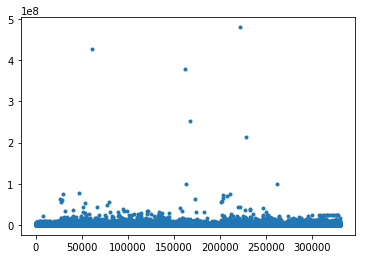

In [32]:
#baseprueba["MONTO_RECLAMADO"].plot()
plt.plot(base1["MONTO RECLAMADO"], '.')

In [33]:
# Exporto el dataset

base1.to_excel(r'C:\Users\eangenello\Desktop\TECNICA\Python\output\Stock Juicios Abiertos al 31-03-2019.xlsx.xlsx', index=False)